In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_excel("Win_Prediction_Data.xlsx")
df.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost


In [44]:
print('data_dimension:',df.shape,'\n','col_names and types:',df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10061 entries, 0 to 10060
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Client Category   9982 non-null   object        
 1   Solution Type     10061 non-null  object        
 2   Deal Date         10061 non-null  datetime64[ns]
 3   Sector            10061 non-null  object        
 4   Location          10061 non-null  object        
 5   VP Name           10061 non-null  object        
 6   Manager Name      10061 non-null  object        
 7   Deal Cost         10061 non-null  float64       
 8   Deal Status Code  10061 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 707.5+ KB
data_dimension: (10061, 9) 
 col_names and types: None


In [3]:
#converting string values to lowercase to check the duplicated rows
cat_cols=['Client Category','Solution Type','Sector','Location','VP Name','Manager Name']

for i in cat_cols:
    df[i]=df[i].str.lower()

df.duplicated().sum() #14 duplicates
df.drop_duplicates(inplace=True) 

In [4]:
#checkig for Missing values
(df.isna().sum()/len(df))*100
#only clinet category has 79 missing which is 0.78% , we could either replace them with mode or we can drop them off


Client Category     0.786304
Solution Type       0.000000
Deal Date           0.000000
Sector              0.000000
Location            0.000000
VP Name             0.000000
Manager Name        0.000000
Deal Cost           0.000000
Deal Status Code    0.000000
dtype: float64

In [5]:
#before that lets check the corresponding column values 
df[df['Client Category'].isna()]
#there is no specific pattern found in variables with respect to missing records 
# hence dropping off these missing records
df.dropna(inplace=True)

In [6]:
# number of lables in each column
df[cat_cols].nunique()

Client Category     41
Solution Type       67
Sector              25
Location            13
VP Name             43
Manager Name       277
dtype: int64

In [51]:
#there are too many lables in each feature, lets see of we could reduce them
df['Client Category'].unique()
# banking:  'domestic public bank','international bank','domestic private bank','domestic bank','govt bank special'
# healthcare:'medical ','pharma',
# 'finance': 'payment','tax_audit','share_market','insurance','holding'
# 'energy' :'energy ' duplicate category because of space,'power ind'
# 'real estate': 'infrastructure','hospitality'
# 'knowledge': 'research development', 
# 'tech': 'electronics', 'telecom','e-commerce'
# 'services_based': 'management', 'consulting'

array(['telecom', 'internal', 'govt', 'consumer good',
       'international bank', 'domestic public bank', 'finance',
       'manufacturing', 'services_based', 'research development',
       'others', 'hospitality', 'consulting', 'retail_market', 'energy ',
       'domestic private bank', 'industries', 'tech', 'healthcare',
       'electronics', 'domestic bank', 'automobiles', 'medical ',
       'infrastructure', 'pharma', 'power ind', 'holding', 'logistics',
       'insurance', 'payment', 'energy', 'govt bank special',
       'management', 'media_journal', 'international org', 'real estate',
       'tax_audit', 'share_market', 'knowledge', 'airpline', 'e-commerce'],
      dtype=object)

In [7]:
#Clubbing Banking Category
df['Client Category']=np.where(df['Client Category']=='domestic public bank','banking',df['Client Category'])
df['Client Category']=np.where(df['Client Category']=='international bank','banking',df['Client Category'])
df['Client Category']=np.where(df['Client Category']=='domestic private bank','banking',df['Client Category'])
df['Client Category']=np.where(df['Client Category']=='domestic bank','banking',df['Client Category'])
df['Client Category']=np.where(df['Client Category']=='govt bank special','banking',df['Client Category'])

#Clubbing healthcare category
df['Client Category']=np.where(df['Client Category']=='medical ','healthcare',df['Client Category'])
df['Client Category']=np.where(df['Client Category']=='pharma','healthcare',df['Client Category'])

#Clubbing finance category
df['Client Category']=np.where(df['Client Category']=='payment','finance',df['Client Category'])
df['Client Category']=np.where(df['Client Category']=='tax_audit','finance',df['Client Category'])
df['Client Category']=np.where(df['Client Category']=='share_market','finance',df['Client Category'])
df['Client Category']=np.where(df['Client Category']=='insurance','finance',df['Client Category'])
df['Client Category']=np.where(df['Client Category']=='holding','finance',df['Client Category'])

#Clubbing energy category
df['Client Category']=np.where(df['Client Category']=='energy ','energy',df['Client Category'])
df['Client Category']=np.where(df['Client Category']=='power ind','energy',df['Client Category'])

#Clubbing real estate
df['Client Category']=np.where(df['Client Category']=='infrastructure','real estate',df['Client Category'])
df['Client Category']=np.where(df['Client Category']=='hospitality','real estate',df['Client Category'])

#Clubbing knowledge
df['Client Category']=np.where(df['Client Category']=='research development','knowledge',df['Client Category'])

#Clubbing tech
df['Client Category']=np.where(df['Client Category']=='e-commerce','tech',df['Client Category'])
df['Client Category']=np.where(df['Client Category']=='telecom','tech',df['Client Category'])
df['Client Category']=np.where(df['Client Category']=='electronics','tech',df['Client Category'])

#Clubbing services_based
df['Client Category']=np.where(df['Client Category']=='management','services_based',df['Client Category'])
df['Client Category']=np.where(df['Client Category']=='consulting','services_based',df['Client Category'])


In [8]:
df['Client Category'].nunique()
# since Solution, sector,location are encoded, hence we can't build any reasonign to club them

20

In [6]:
# at some places VP name and manager name are same
# out of 43 VPs, 22vp has worked as a manager as well as a Vp both on some projects
#df[(df['VP Name']==df['Manager Name'])]['VP Name'].value_counts()
df[(df['VP Name']==df['Manager Name'])]['Deal Status Code'].value_counts()

Lost    64
Won     58
Name: Deal Status Code, dtype: int64

In [106]:
(df['Deal Status Code'].value_counts())/len(df)
#this summerises that 3 in 5 project deals will be lost by the company.

#df[['Manager Name']].value_counts()[190:210] #one anomaly found at : mayank chaudhary @ rahul

0    0.625401
1    0.374599
Name: target, dtype: float64

<AxesSubplot:xlabel='Deal Status Code', ylabel='count'>

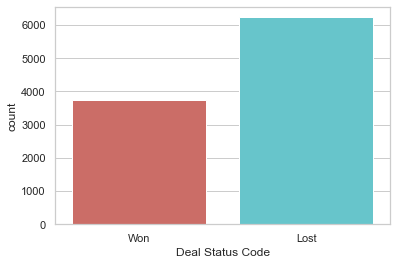

In [7]:
sns.countplot(x='Deal Status Code',data=df,palette='hls')
#Our classes are imbalanced

In [9]:
df.groupby('Deal Status Code').mean()
# avg mean of cost for won and lost projects are same

,Deal Cost
Deal Status Code,
Lost,758236.474049
Won,785653.061417


In [58]:
df.groupby('Client Category').mean().sort_values('Deal Cost',ascending=False)
#the most valued projects come from energy and internal Client category

In [22]:
df.groupby('Solution Type').sum().sort_values('Deal Cost',ascending=False)


,Deal Cost
Solution Type,
solution 32,9.641024e+08
solution 9,9.055468e+08
solution 10,6.580009e+08
solution 39,4.745391e+08
solution 59,4.692744e+08
...,...
solution 57,3.235294e+05
solution 56,2.941177e+05
solution 54,2.352941e+05


In [28]:
#converting target into number
df['target']=df['Deal Status Code'].apply(lambda x:1 if x== 'Won' else 0)

Text(0, 0.5, 'Number of Projects')

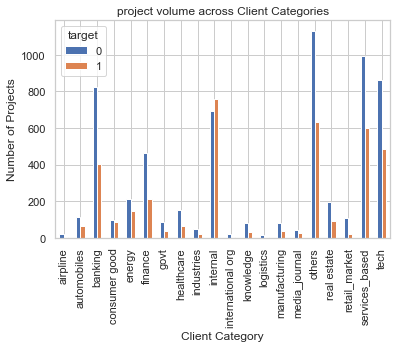

In [44]:
%matplotlib inline
pd.crosstab(df['Client Category'],df.target).plot(kind='bar')
plt.title('project volume across Client Categories')
plt.ylabel('Number of Projects')

#'internal' client category has won the maximun no of deals 
# project volume somehow depends on the client category, hence this could be a good predictor for the model

Text(0, 0.5, 'Proportion of Project Volume')

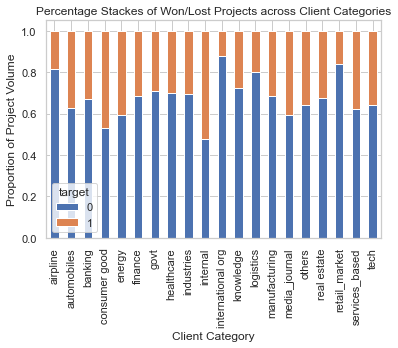

In [57]:
#table=
pd.crosstab(df['Client Category'],df.target)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('Percentage Stackes of Won/Lost Projects across Client Categories')
plt.ylabel('Proportion of Project Volume')
#clients from 'consumer good' and Internal category has the best winning conversion 

Text(0, 0.5, 'Number of Projects')

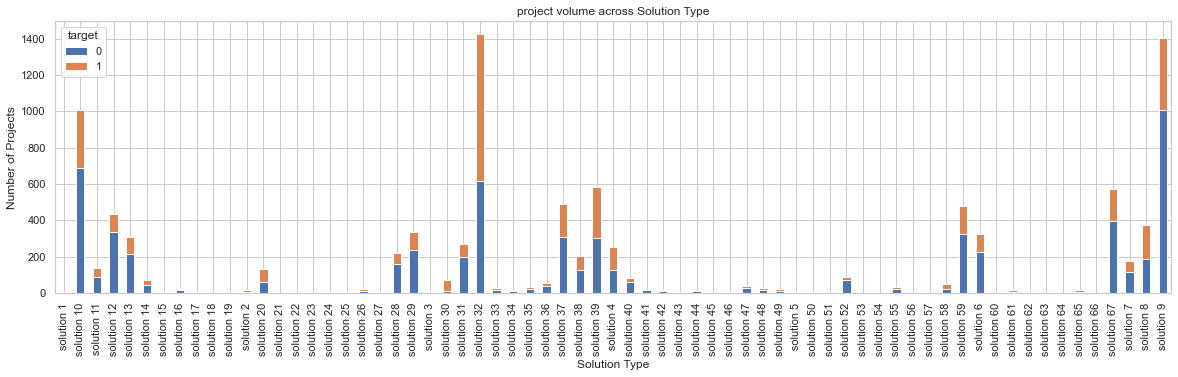

In [97]:
pd.crosstab(df['Solution Type'],df.target).plot(kind='bar',figsize=(20,5),stacked=True)
plt.title('project volume across Solution Type')
plt.ylabel('Number of Projects')

Text(0.5, 1.0, 'WINNING/LOSING PROPORTION ACROSS OFFERED SOLUTIONS: for few solutons winning proportion looks 100% but at the same time their project volumne is relativelu quite low')

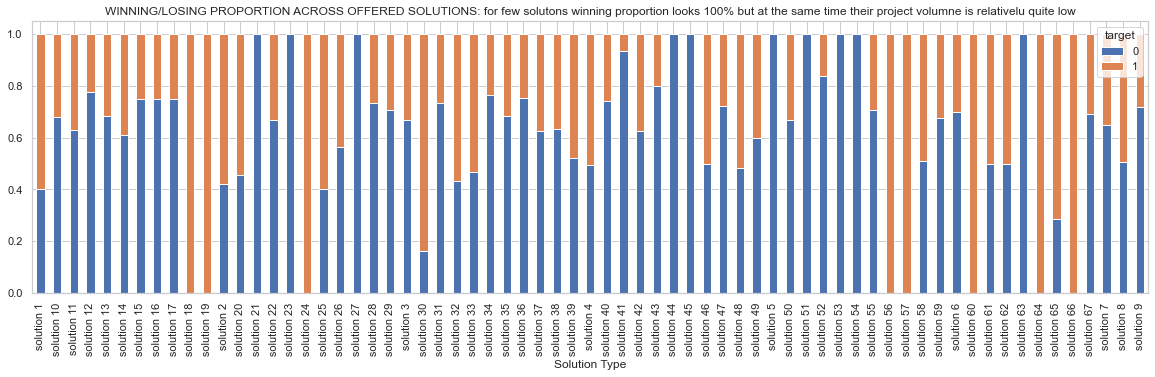

In [65]:
table=pd.crosstab(df['Solution Type'],df.target)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',figsize=(20,5),stacked=True)
plt.title('WINNING/LOSING PROPORTION ACROSS OFFERED SOLUTIONS: for few solutons winning proportion looks 100% but at the same time their project volumne is relatively quite low')

#solution type could be good predictor while deciding the winning probability as it is affecting the proportion

Text(0, 0.5, 'Project Count')

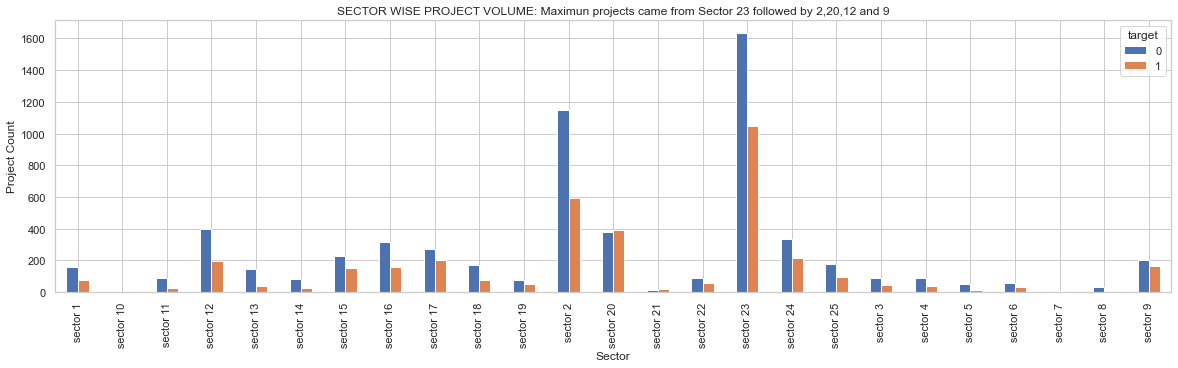

In [63]:
pd.crosstab(df['Sector'],df.target).plot(kind='bar',figsize=(20,5))
plt.title('SECTOR WISE PROJECT VOLUME: Maximun projects came from Sector 23 followed by 2,20,12 and 9')
plt.ylabel('Project Count')

Text(0, 0.5, 'Winning/Losing Proportion of Project Volume')

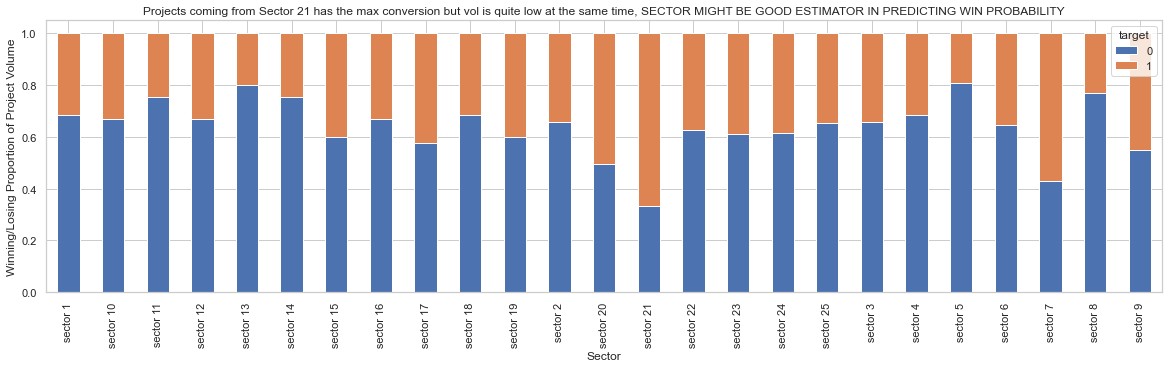

In [76]:
table=pd.crosstab(df['Sector'],df.target)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(20,5))
plt.title('Projects coming from Sector 21 has the max conversion but vol is quite low at the same time, SECTOR MIGHT BE GOOD ESTIMATOR IN PREDICTING WIN PROBABILITY')
plt.ylabel('Winning/Losing Proportion of Project Volume')

Text(0, 0.5, 'PROJECT COUNT')

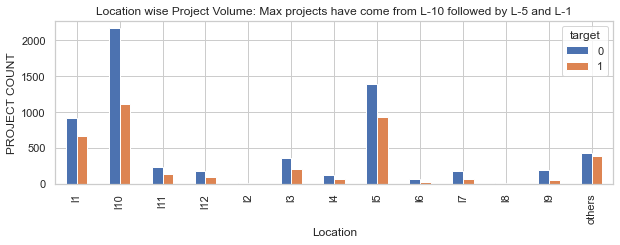

In [77]:
pd.crosstab(df['Location'],df.target).plot(kind='bar',figsize=(10,3))
plt.title('Location wise Project Volume: Max projects have come from L-10 followed by L-5 and L-1')
plt.ylabel('PROJECT COUNT')

Text(0, 0.5, 'WIN/LOSS PROPORTION OF PROJECTS')

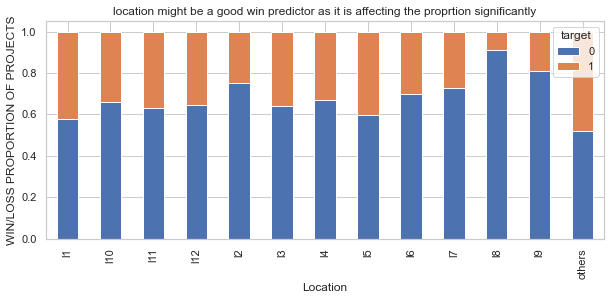

In [80]:
table=pd.crosstab(df['Location'],df.target)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',figsize=(10,4),stacked=True)
plt.title('location might be a good win predictor as it is affecting the proprtion significantly')
plt.ylabel('WIN/LOSS PROPORTION OF PROJECTS')

<AxesSubplot:xlabel='VP Name'>

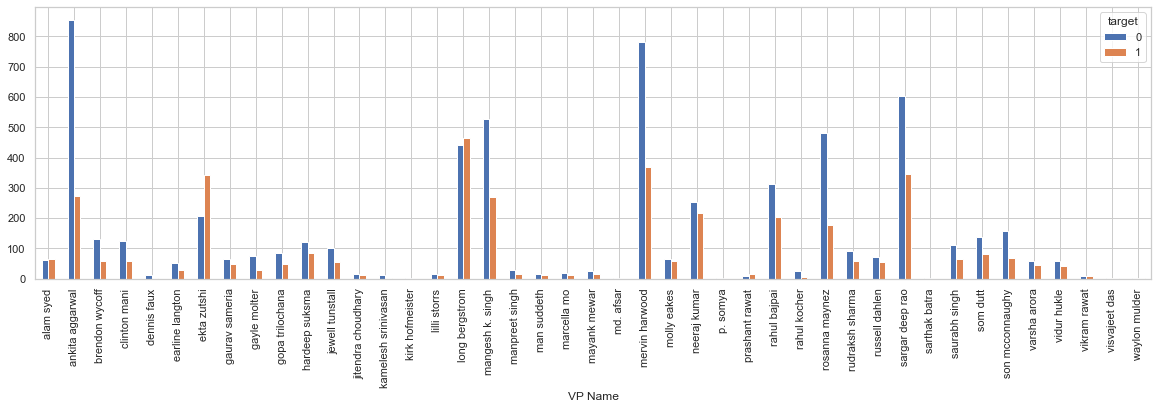

In [82]:
pd.crosstab(df['VP Name'],df.target).plot(kind='bar',figsize=(20,5))

<AxesSubplot:xlabel='VP Name'>

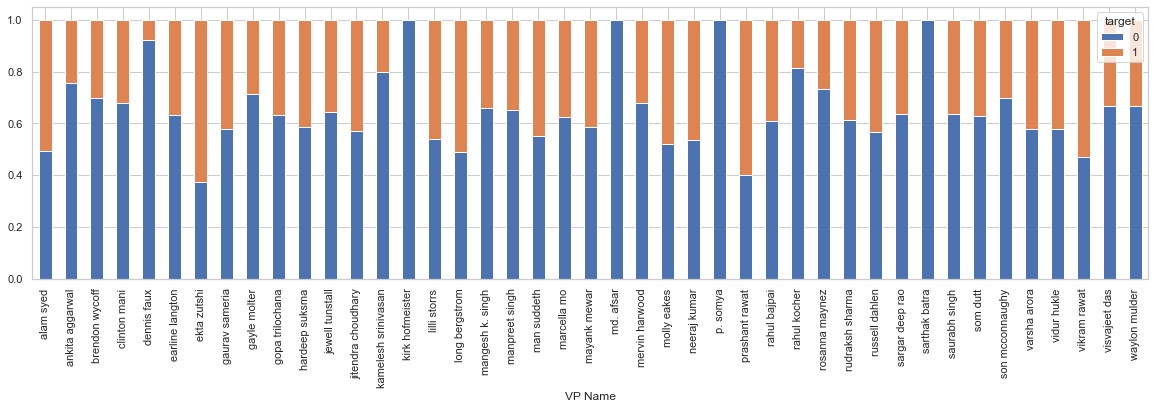

In [83]:
table=pd.crosstab(df['VP Name'],df.target)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',figsize=(20,5),stacked=True)

<AxesSubplot:ylabel='Manager Name'>

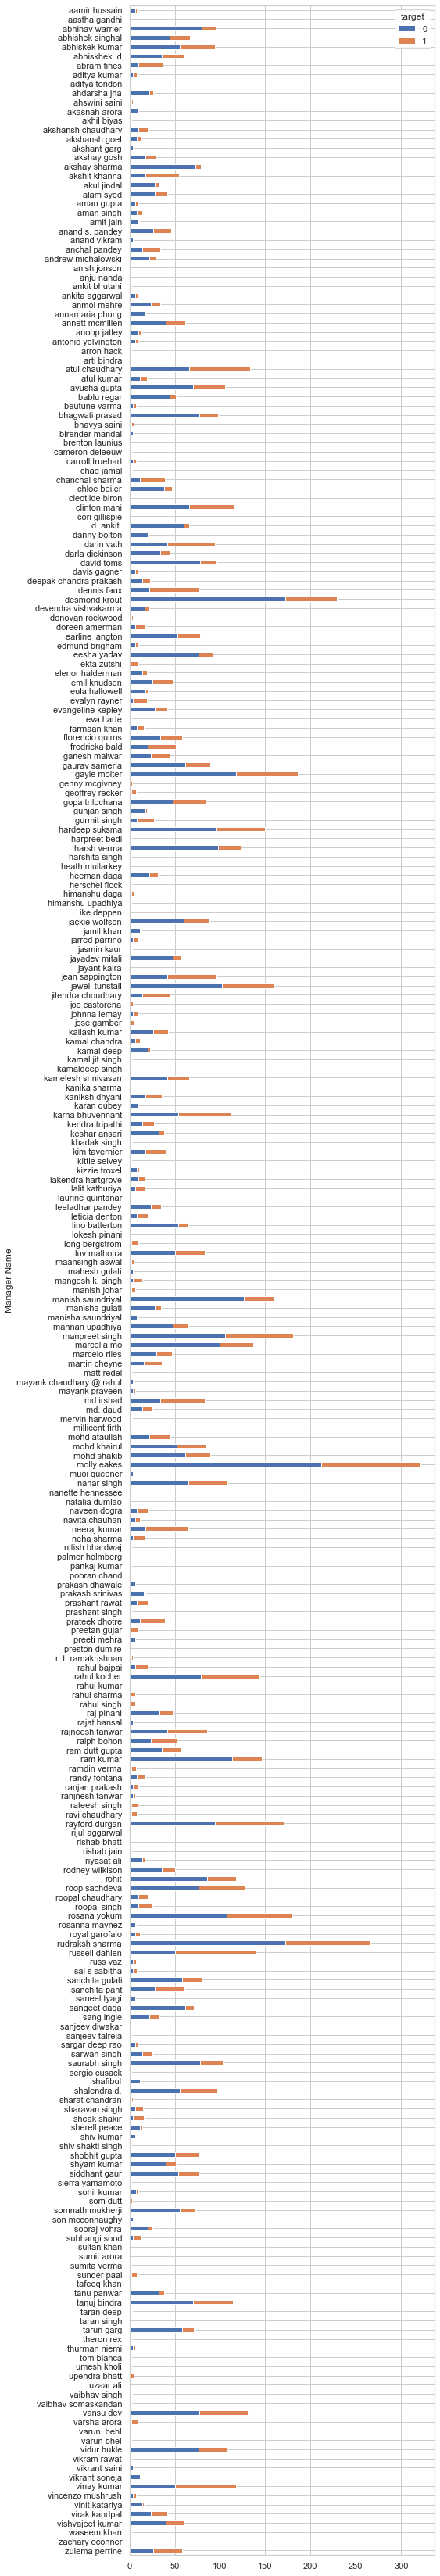

In [98]:
pd.crosstab(df['Manager Name'],df.target).sort_values('Manager Name', ascending=False).plot(kind='barh',figsize=(7,60),stacked=True)
    


<AxesSubplot:ylabel='Manager Name'>

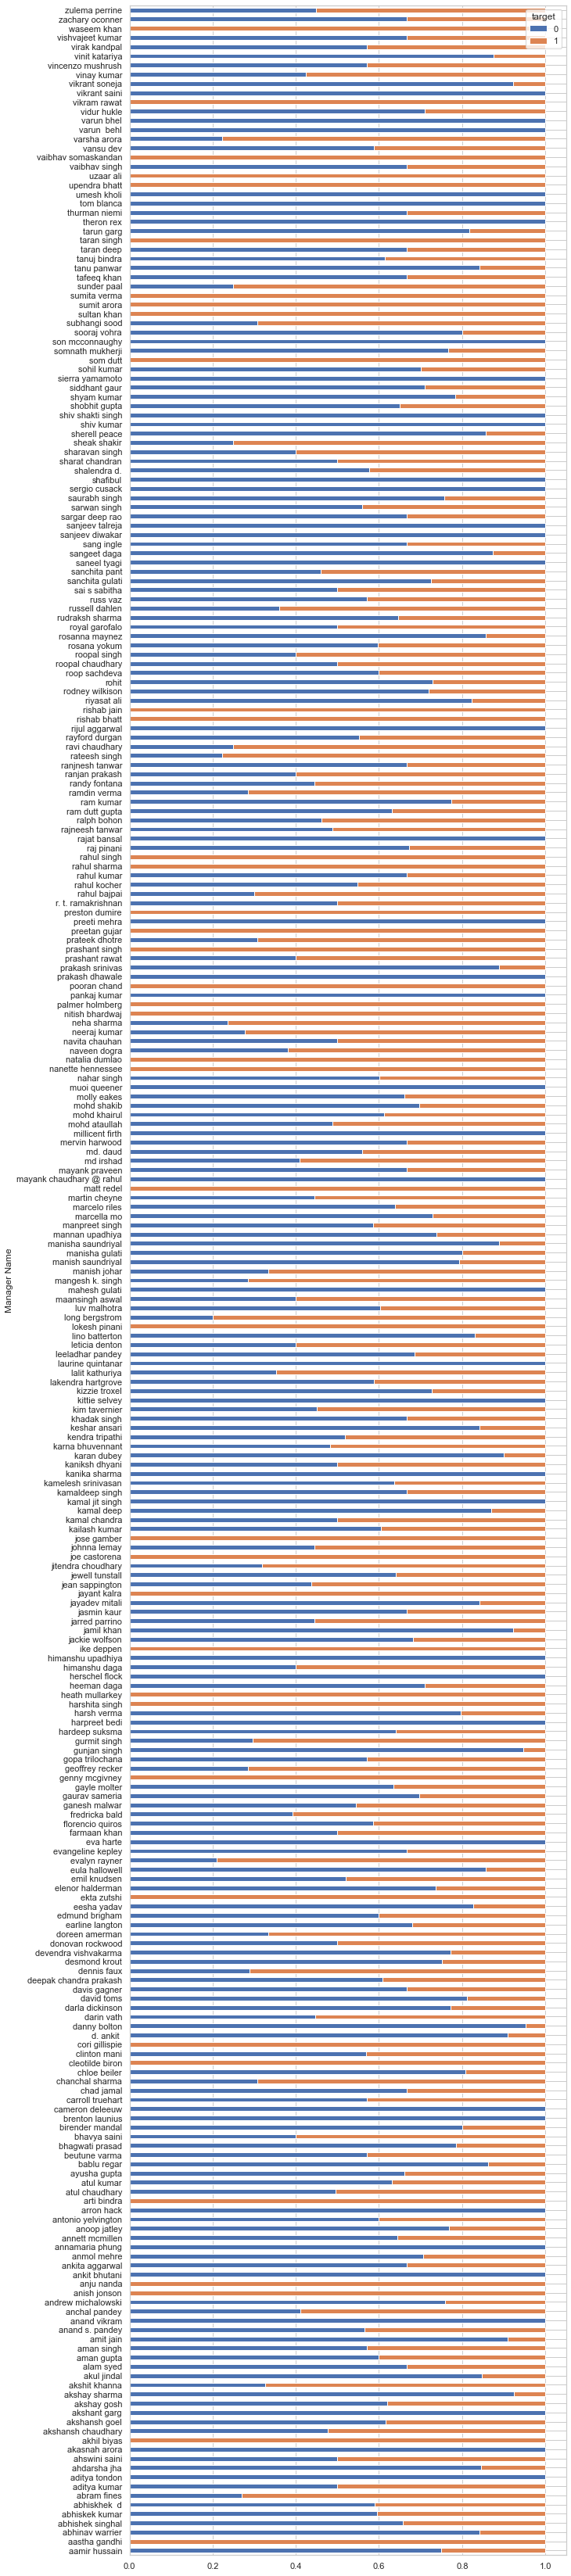

In [96]:
table=pd.crosstab(df['Manager Name'],df.target)
table.div(table.sum(1).astype(float),axis=0).plot(kind='barh',figsize=(10,60),stacked=True)
 

<AxesSubplot:>

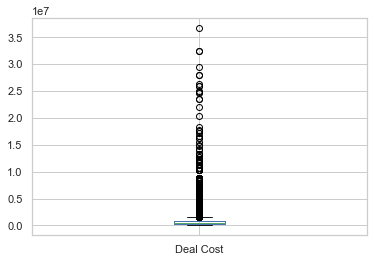

In [112]:
(df['Deal Cost']).plot(kind='box')

0.00    0.000000e+00
0.01    0.000000e+00
0.02    0.000000e+00
0.03    1.470590e+03
0.04    2.941180e+03
            ...     
0.96    2.882353e+06
0.97    3.278038e+06
0.98    4.460088e+06
0.99    6.911765e+06
1.00    3.676471e+07
Name: Deal Cost, Length: 101, dtype: float64


<AxesSubplot:>

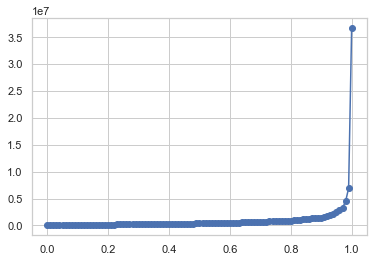

In [115]:
#lets look at them closely
print(df['Deal Cost'].quantile(np.arange(0,1.01,0.01)))
df['Deal Cost'].quantile(np.arange(0,1.01,0.01)).plot(kind='line',marker='o')

In [29]:
#capping is required at 97

df['Deal Cost']=df['Deal Cost'].apply(lambda x:  3.258529e+06 if x>3.258529e+06 else x)

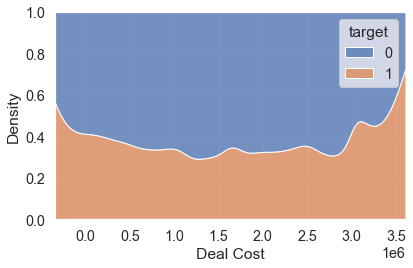

In [118]:
#density relationship
sns.set(font_scale=1.3)
sns.kdeplot(x='Deal Cost',hue='target',multiple='fill',data=df)
plt.tight_layout()

In [30]:
#extracting year , month,day, week, weekday separately from date variable.
df['year']= df['Deal Date'].dt.year

df['month']= df['Deal Date'].dt.month

df['day']= df['Deal Date'].dt.day

df['weekday']=df['Deal Date'].dt.dayofweek

df['week']=df['Deal Date'].dt.week

df['quarter']=df['Deal Date'].dt.quarter

'''
#converting them into string 
df['year']=df['year'].astype('str')
df['month']=df['month'].astype('str')
df['day']=df['day'].astype('str')

'''

C:\Users\Vipul Tyagi\anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  # Remove the CWD from sys.path while we load stuff.


"\n#converting them into string \ndf['year']=df['year'].astype('str')\ndf['month']=df['month'].astype('str')\ndf['day']=df['day'].astype('str')\n\n"

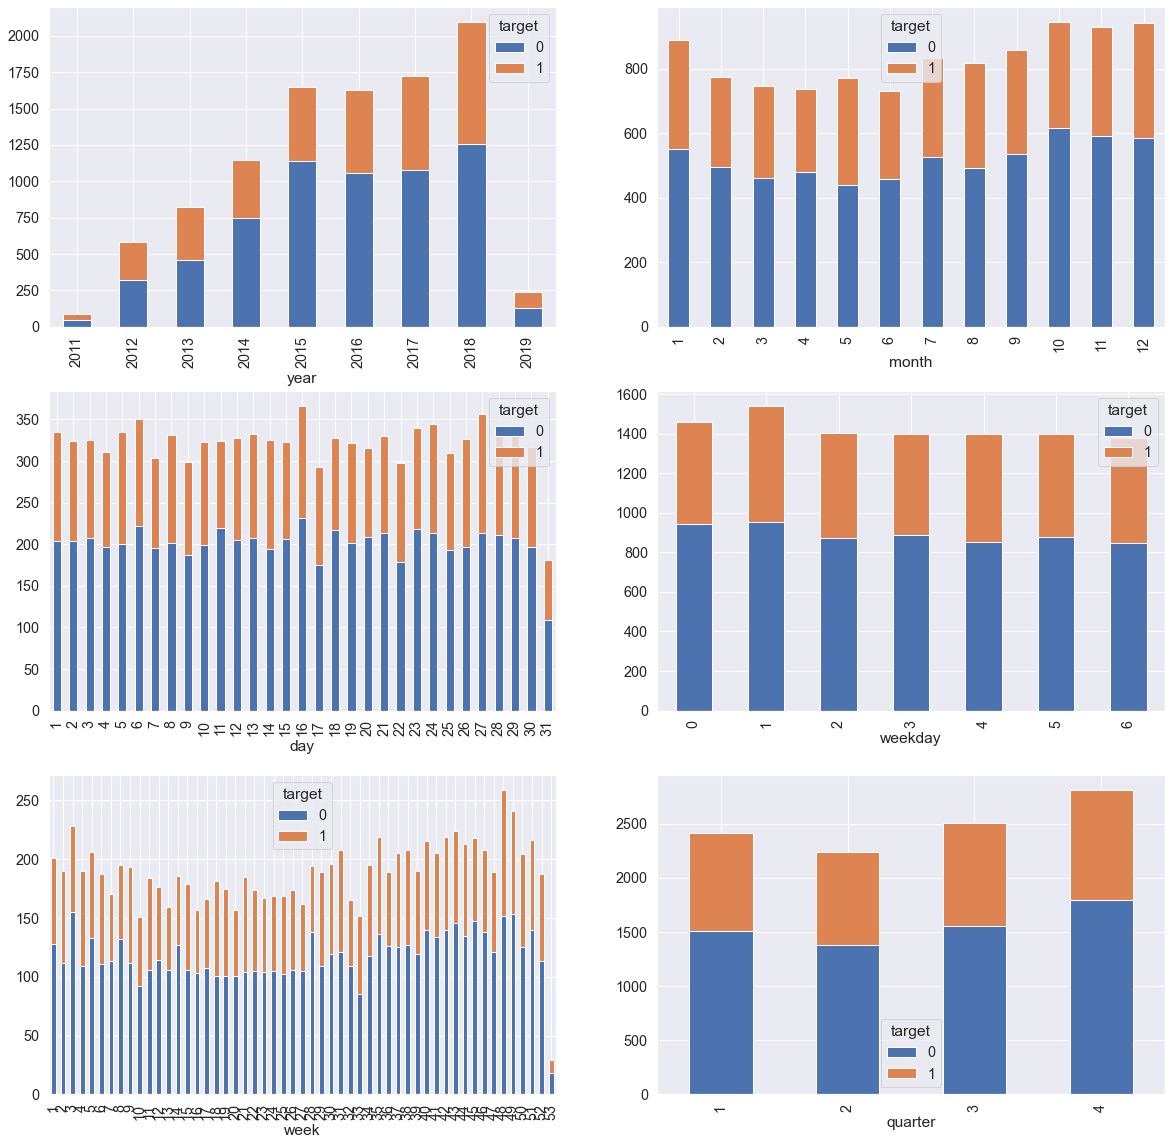

In [120]:
#analysis across date variable
date_cols=['year','month','day','weekday','week','quarter']

fig,axes= plt.subplots(3,2,figsize=(20,20))
axes=[i for j in axes for i in j]

for i,j in enumerate (df[date_cols]):
    pd.crosstab(df[j],df.target).plot(kind='bar',ax=axes[i],stacked=True)
    
#project count across day , weekday, quarter, week are almost constant.
#so We are keeping only Year and month

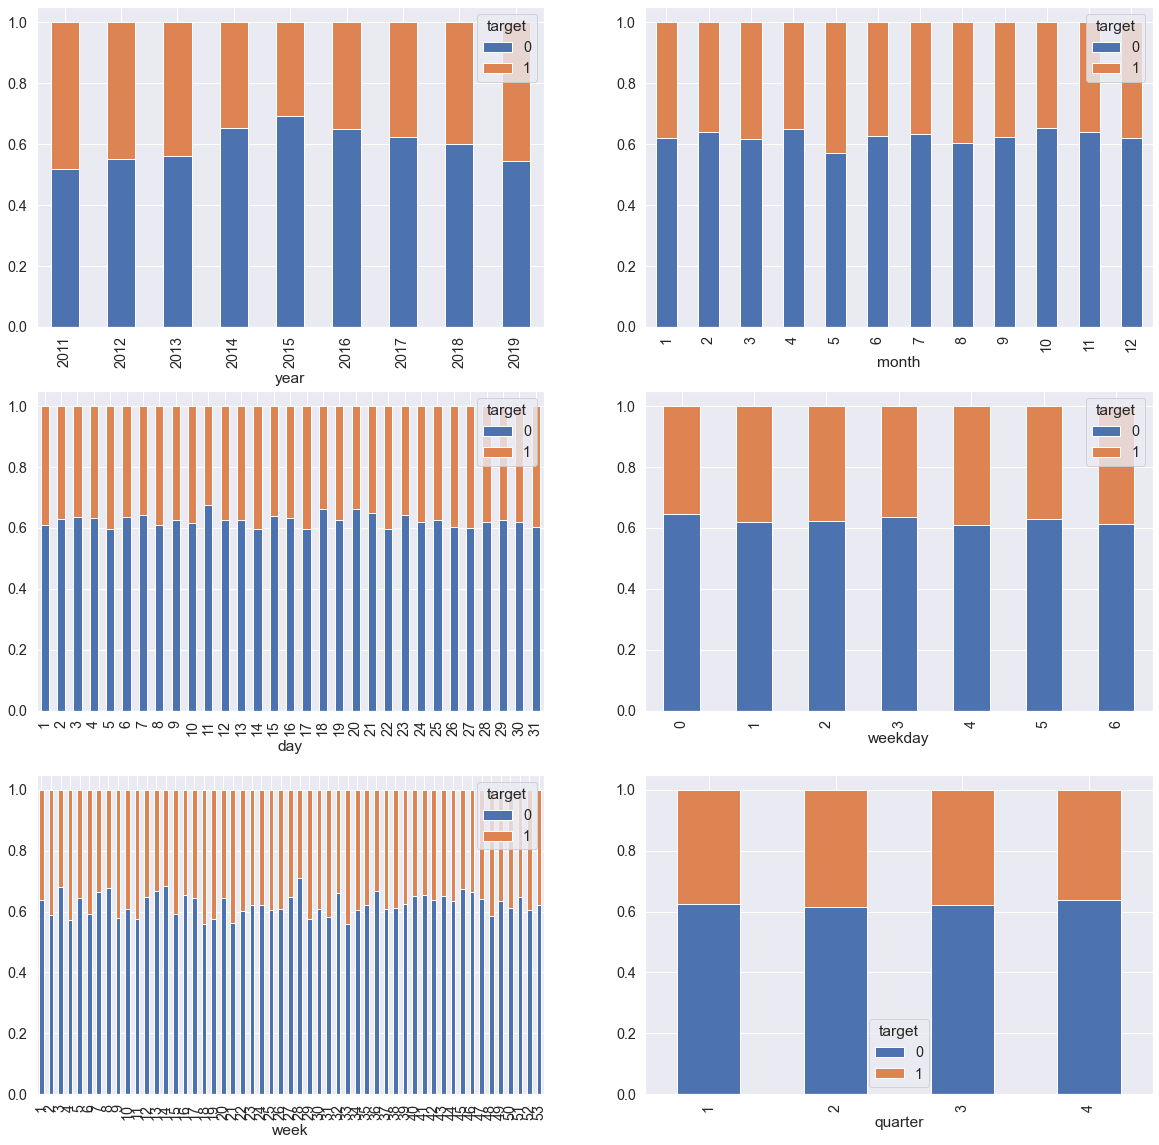

In [121]:
fig,axes= plt.subplots(3,2,figsize=(20,20))
axes=[i for j in axes for i in j]

for i,j in enumerate (df[date_cols]):
    
    table=pd.crosstab(df[j],df.target)
    table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',ax=axes[i],stacked=True)    

In [31]:
df.drop(['Deal Date','week','quarter','weekday','day','Deal Status Code','month'], axis =1,inplace=True)

In [123]:
#lest see top 5 categories across all variables
cat_cols=['Client Category','Solution Type','Sector','Location','VP Name','Manager Name','year']
fig,axes= plt.subplots(3,2,figsize=(20,15))
axes=[i for j in axes for i in j]

for i,j in enumerate (df[cat_cols]):
    
    df[j].value_counts()[:5].plot(kind='bar',ax=axes[i],title=j,fontsize=14)
    plt.tight_layout()      

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost,target,year
0,tech,solution 7,sector 24,l5,ekta zutshi,gopa trilochana,150000.00,1,2012
1,tech,solution 7,sector 24,l5,ekta zutshi,gopa trilochana,744705.88,1,2012
2,internal,solution 59,sector 20,others,ekta zutshi,russell dahlen,60000.00,0,2011
3,internal,solution 59,sector 20,others,ekta zutshi,russell dahlen,60000.00,0,2011
4,internal,solution 32,sector 20,others,ekta zutshi,russell dahlen,80882.35,0,2011


In [11]:
#label encoding: lest look at the number of labels in each category
cat_cols=['Client Category','Solution Type','Sector','Location','VP Name','Manager Name','year']
for i in df[cat_cols].columns:
    print(i, ':', len(df[i].unique()),'labels')

Client Category : 20 labels
Solution Type : 67 labels
Sector : 25 labels
Location : 13 labels
VP Name : 43 labels
Manager Name : 277 labels
year : 9 labels


In [32]:
#trying frequency encoding 
freq_cols=['Manager Name','Solution Type','VP Name']

for i in df[freq_cols].columns:
    freq_map=df[i].value_counts().to_dict()
    df[i]=df[i].map(freq_map)
    
#standardization is not required for logistic regression, hence skipping the step    

In [37]:
df['year']=df['year'].astype('str')
hot_cols=['Client Category','Sector','Location','year']

just_dummies=pd.get_dummies(df[hot_cols])
df2 = pd.concat([df, just_dummies], axis=1)      
df2.drop(['Client Category','Sector','Location','year'], inplace=True, axis=1)

In [38]:
df2.columns

Index(['Solution Type', 'VP Name', 'Manager Name', 'Deal Cost', 'target',
       'Client Category_airpline', 'Client Category_automobiles',
       'Client Category_banking', 'Client Category_consumer good',
       'Client Category_energy', 'Client Category_finance',
       'Client Category_govt', 'Client Category_healthcare',
       'Client Category_industries', 'Client Category_internal',
       'Client Category_international org', 'Client Category_knowledge',
       'Client Category_logistics', 'Client Category_manufacturing',
       'Client Category_media_journal', 'Client Category_others',
       'Client Category_real estate', 'Client Category_retail_market',
       'Client Category_services_based', 'Client Category_tech',
       'Sector_sector 1', 'Sector_sector 10', 'Sector_sector 11',
       'Sector_sector 12', 'Sector_sector 13', 'Sector_sector 14',
       'Sector_sector 15', 'Sector_sector 16', 'Sector_sector 17',
       'Sector_sector 18', 'Sector_sector 19', 'Sector_sector 2

### Balancing the class using SMOTE

In [39]:
X = df2.loc[:, df2.columns != 'target']
y = df2.loc[:, df2.columns == 'target']

from imblearn.over_sampling import SMOTE

os=SMOTE(random_state=0)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

columns=X_train.columns

os_data_X,os_data_y=os.fit_sample(X_train,y_train)
os_data_X=pd.DataFrame(data=os_data_X,columns=columns)
os_data_y=pd.DataFrame(data=os_data_y,columns=['target'])

#lets check the numer of data oversampeled
print("length of oversampled data is ",len(os_data_X))
print("Number of lost deals in oversampled data",len(os_data_y[os_data_y['target']==0]))
print("Number of won deals",len(os_data_y[os_data_y['target']==1]))
print("Proportion of lost deal data in oversampled data is ",len(os_data_y[os_data_y['target']==0])/len(os_data_X))
print("Proportion of won deal data in oversampled data is ",len(os_data_y[os_data_y['target']==1])/len(os_data_X))

length of oversampled data is  8702
Number of lost deals in oversampled data 4351
Number of won deals 4351
Proportion of lost deal data in oversampled data is  0.5
Proportion of won deal data in oversampled data is  0.5


### Recursive Feature Elimination
###### REF is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [41]:
data_final_vars=df2.columns.values.tolist()
y=['target']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

C:\Users\Vipul Tyagi\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\Vipul Tyagi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Vipul Tyagi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True  True  True  True False  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True]
[50 51 49 52  7 19 15 25 26 16 22 14 17 27 10 11 13 12 23 18 24  5 21 20
 31 45  9 33  6 30 39 35 47 29 41 36 46  4 43 44 40 34 32 37 28 42 48  8
 38  1  1  1  1  3  1  1  1  1  1  1  1  2  1  1  1  1  1  1  1  1  1]


In [40]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.630664
         Iterations 6
                                         Results: Logit
Model:                         Logit                      Pseudo R-squared:           0.046     
Dependent Variable:            target                     AIC:                        12708.9226
Date:                          2021-02-12 18:57           BIC:                        13199.0078
No. Observations:              9968                       Log-Likelihood:             -6286.5   
Df Model:                      67                         LL-Null:                    -6592.4   
Df Residuals:                  9900                       LLR p-value:                6.0306e-89
Converged:                     1.0000                     Scale:                      1.0000    
No. Iterations:                6.0000                                                           
------------------------------------------------------------------

#### The p-values analysis


In [43]:
cols=['Client Category','Solution Type','VP Name','Manager Name','year']
X=os_data_X[cols]
y=os_data_y['target']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())


"cols=['Client Category','Solution Type','VP Name','Manager Name','year']\nX=os_data_X[cols]\ny=os_data_y['target']\nlogit_model=sm.Logit(y,X)\nresult=logit_model.fit()\nprint(result.summary2())\n\n"

### Logistic Regression Model Fitting

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
logreg=LogisticRegression()
logreg.fit(X_train,y_train)


LogisticRegression()

### Predicting the test set results and calculating the accuracy

In [44]:
y_pred=logreg.predict(X_test)

print('accuracy:',logreg.score(X_test,y_test))


"y_pred=logreg.predict(X_test)\n\nprint('accuracy:',logreg.score(X_test,y_test))\n"

In [21]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[738 550]
 [644 679]]


#### The result is telling us that we have [738+679] correct predictions and [644+550] incorrect predictions.

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.57      0.55      1288
           1       0.55      0.51      0.53      1323

    accuracy                           0.54      2611
   macro avg       0.54      0.54      0.54      2611
weighted avg       0.54      0.54      0.54      2611



#### ROC curve

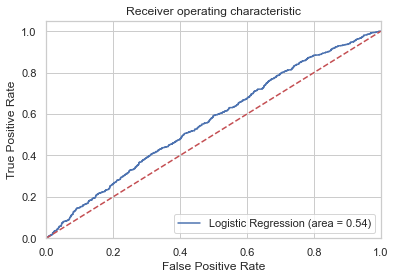

In [23]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()